# D-dimensional random walk (using object oriented programming)

In [13]:
using Random
using PyPlot
include("PlotSingleWalk.jl");

In [14]:
mutable struct Pos
    x::Float64
    y::Float64
    z::Float64
    dim::Int64
end

function Pos(x::Float64)
    return Pos(x, 0.0, 0.0, 1)
end

function Pos(x::Float64, y::Float64)
    return Pos(x, y, 0.0, 2)
end

function Pos(x::Float64, y::Float64, z::Float64)
    return Pos(x, y, z, 3)
end

function Pos(dim::Int64)
    if dim > 0 && dim < 4
        return Pos(0.0, 0.0, 0.0, dim)
    else
        return "Dimension bounds are (0,3)"
    end
end

function Base.getindex(p::Pos, i)
    (i ≤ 0 || i > p.dim) && error("Index out of bounds!")
    if i == 1
        return p.x
    elseif i == 2
        return p.y
    else
        return p.z
    end
end

function Base.setindex!(p::Pos, val::Float64, key::Int64)
    (key ≤ 0 || key > p.dim) && error("Index out of bounds!")
    if key == 1
        p.x = val
    elseif key == 2
        p.y = val
    else
        p.z = val
    end
end
;

In [15]:
function Base.:+(a::Pos, b::Pos)
    if a.dim == b.dim
        return Pos(a.x + b.x, a.y + b.y, a.z + b.z, a.dim)
    else
        return "$a and $b have different dimensions"
    end
end;

In [16]:
function generate_moves(dim::Int64)
    moves = [Pos(dim) for i in 1:2*dim]
    odds = filter(i->(isodd(i)), 1:2*dim)
    for j in 1:dim
        i = odds[j]
        moves[i][j] = 1.0
        moves[i+1][j] = -1.0
    end
    return moves
end;

In [17]:
function single_RW(nsteps::Int64=10; dim::Int64=2)
    """ Generate a single random walk
    nsteps = step length of the random walk
    """
    moves = generate_moves(dim)
    p_vec = [Pos(dim)]
    ran_vec = rand(nsteps)
    for i ∈ 1:nsteps
        rn::Int64 = ceil(2*dim*ran_vec[i])
        p = p_vec[i] + moves[rn]
        push!(p_vec, p)
    end
    return p_vec
end;

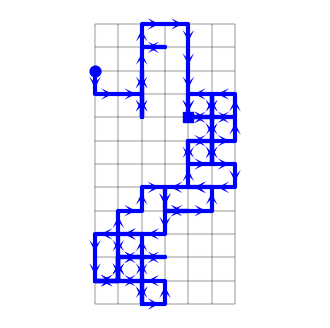

In [18]:
nsteps = 100
r_vec = single_RW(nsteps)
x_vec = [r.x for r in r_vec]
y_vec = [r.y for r in r_vec]
PlotSingleWalk.plot_single_walk(x_vec, y_vec);